In [1]:
import numpy as np
import math
import random

# 주머니 속에 들어있는 공의 개수
total = 1000

# 실험이 끝날 때까지 꺼낸 공의 개수
count = 1

while True:
    sample = random.randrange(1, total+1)
    if sample == total:
        break
    count += 1
    
print('number of blue samples: '+ str(count-1))
print('information content: ' + str(-math.log(1/count)))

number of blue samples: 1143
information content: 7.042286171939743


In [2]:
class_num = 4
q_vector = []
total = 1

for i in range(class_num-1):
    q = random.uniform(0, total)
    q_vector.append(round(q,3))
    total = total - q
    
q_vector.append(total)
softmax_output = np.array(q_vector)

print(softmax_output)


[0.674      0.052      0.049      0.22525601]


In [3]:
class_index = 1

p_vector = np.zeros(class_num)
p_vector[class_index-1]=1

cross_entropy = -np.sum(np.multiply(p_vector, np.log(softmax_output)))

print('model prediction: '+ str(softmax_output))
print('data label: '+ str(p_vector))
print('cross entropy: '+ str(round(cross_entropy,4)))

model prediction: [0.674      0.052      0.049      0.22525601]
data label: [1. 0. 0. 0.]
cross entropy: 0.3945


In [4]:
# 데이터 연결
! mkdir -p ~/aiffel/information_theory
! ln -s ~/data/* ~/aiffel/information_theory

ln: failed to create symbolic link '/aiffel/aiffel/information_theory/diabetes.csv': File exists


In [5]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [6]:
import os
csv_path = os.getenv('HOME') + '/aiffel/information_theory/diabetes.csv'

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
df = pd.read_csv(csv_path, header=0, names=col_names)
df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']
X = df[feature_cols]
y = df.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [8]:
# Decision Tree 모델 학습
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.670995670995671


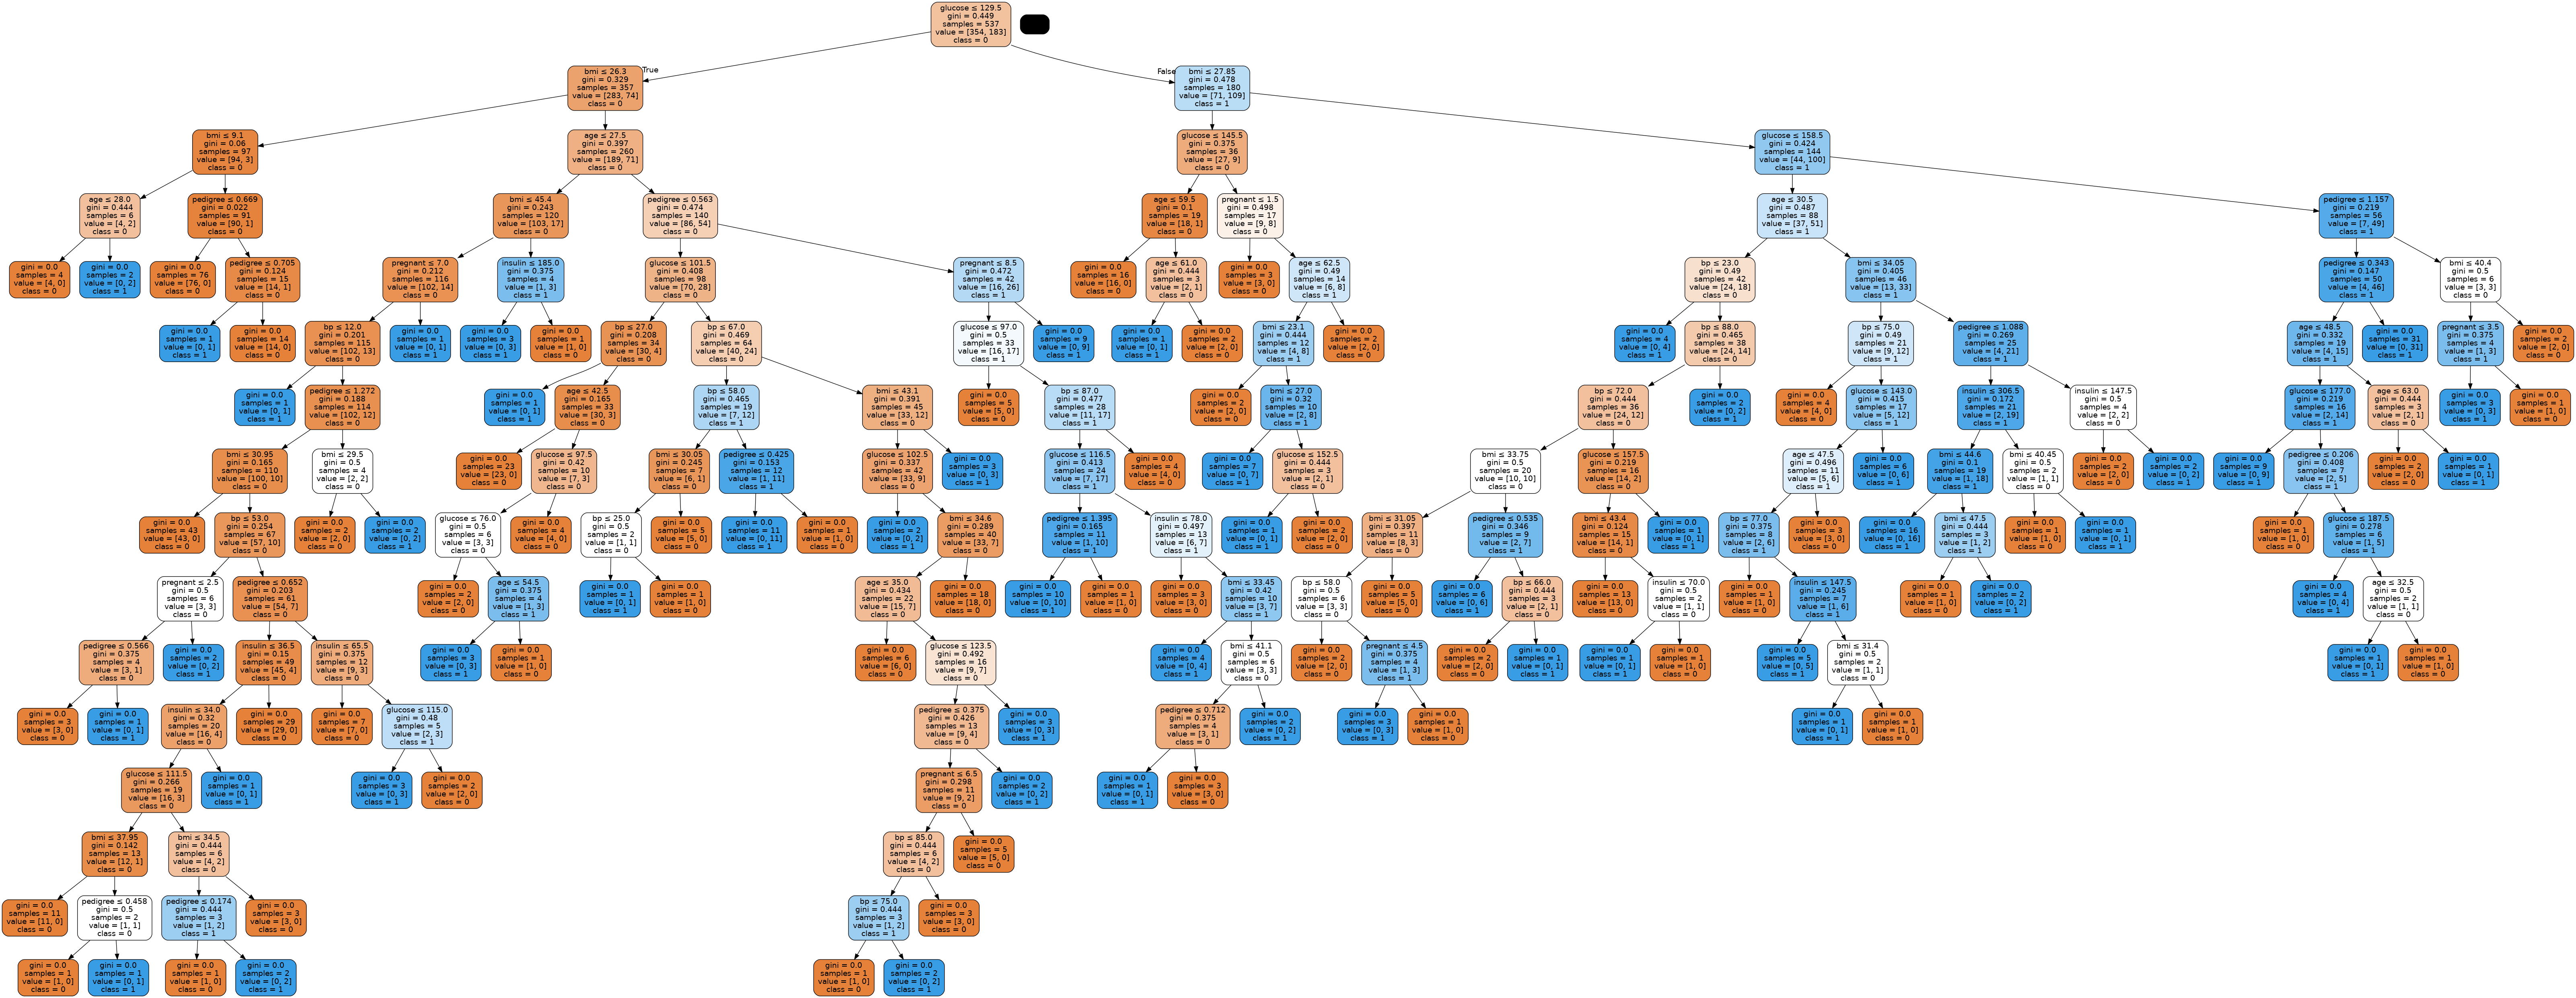

In [9]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf,
               out_file = dot_data,
               filled = True,
               rounded = True,
               special_characters = True,
               feature_names = feature_cols,
               class_names = ['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes1.png')
Image(graph.create_png(), retina=True)

In [10]:
# 정보 이득이 되지 않고 남은 Impurity  총량 측정
ccp_path1 = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_path2 = clf.cost_complexity_pruning_path(X_test, y_test)
print(np.mean(ccp_path1.impurities))
print(np.mean(ccp_path2.impurities))

0.153053671865334
0.14463309851254125


In [11]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7705627705627706


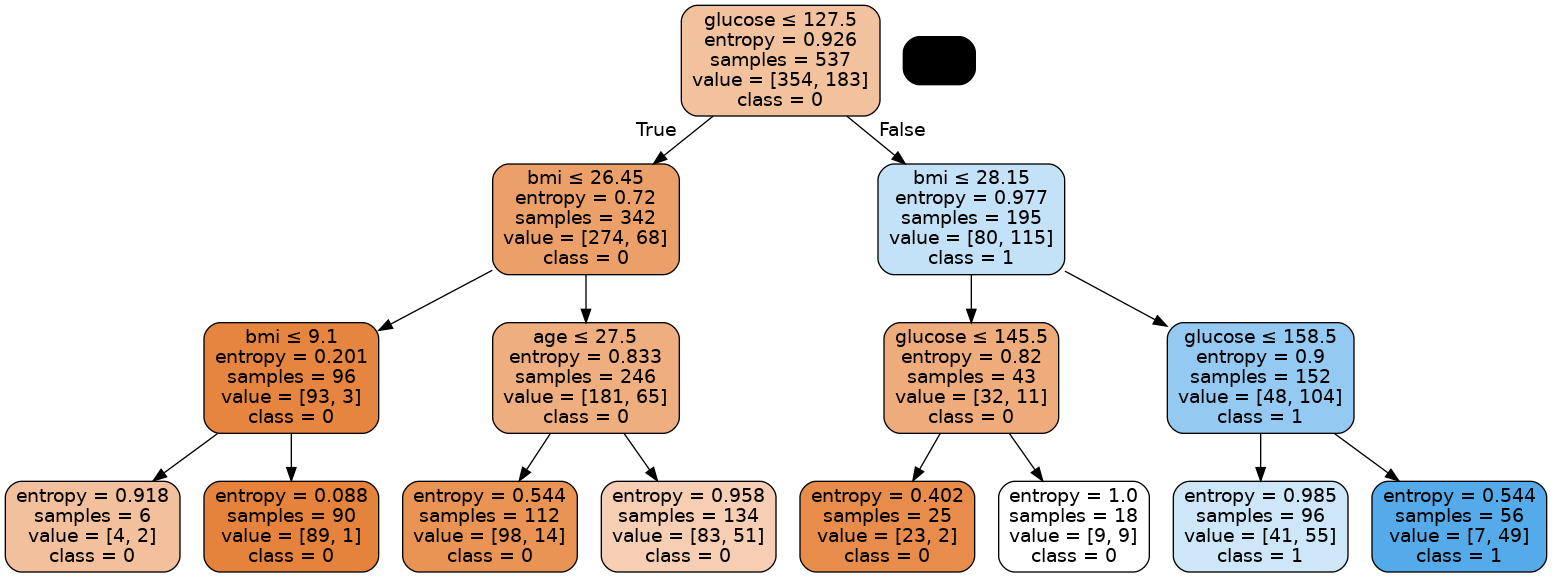

In [12]:
dot_data = StringIO()
export_graphviz(clf,
               out_file = dot_data,
               filled = True,
               rounded=True,
               special_characters = True,
               feature_names = feature_cols,
               class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes2.png')
Image(graph.create_png(), retina=True)


In [13]:
ccp_path1 = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_path2 = clf.cost_complexity_pruning_path(X_test, y_test)
print(np.mean(ccp_path1.impurities))
print(np.mean(ccp_path2.impurities))

0.7474881472739515
0.6878691771636323
